## Observations and Insights

## Dependencies and starter code

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()
study_results.head()
# Combine the data into a single dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Summary statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df.head()
merge_df["Tumor Volume (mm3)"].describe()
merge_df["Tumor Volume (mm3)"].sem()
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Bar plots

In [35]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_df=merge_df.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', 'Tumor Volume (mm3)'])
bar_df.head()


,Mouse ID,Drug Regimen
0,k403,Ramicane
1,k403,Ramicane
2,k403,Ramicane
3,k403,Ramicane
4,k403,Ramicane


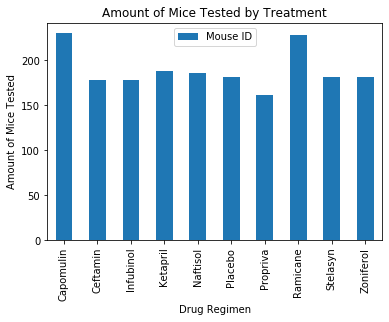

In [114]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pandas_bar_df=bar_df.groupby(['Drug Regimen']).agg({'Mouse ID': 'count'})
pandas_bar_df.plot(kind= "bar",title='Amount of Mice Tested by Treatment')
plt.ylabel('Amount of Mice Tested')
plt.show()

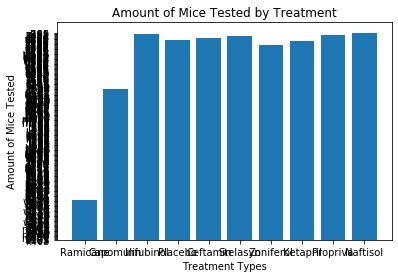

In [119]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug= bar_df["Drug Regimen"]
mice= bar_df['Mouse ID']
plt.bar(drug, mice)
plt.title('Amount of Mice Tested by Treatment')
plt.xlabel('Treatment Types')
plt.ylabel('Amount of Mice Tested')
plt.show()

## Pie plots

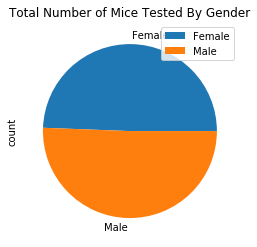

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df= merge_df.drop(columns=['Drug Regimen','Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', 'Tumor Volume (mm3)'])

gender_df.head()
gender_df = gender_df.groupby(['Sex']).agg({'Mouse ID' : 'count'})
gender_df = gender_df.rename(columns={'Mouse ID': 'count'})
gender_df.plot(kind='pie', y='count' , title='Total Number of Mice Tested By Gender')#p

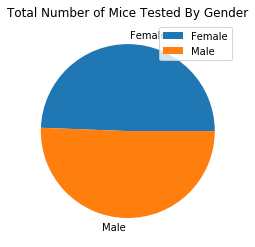

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= 'Female', 'Male'
plt.pie(gender_df['count'],labels=labels)
plt.title("Total Number of Mice Tested By Gender")
plt.legend()
plt.show()



## Quartiles, outliers and boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
results_df=merge_df.drop(columns=['Sex','Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', "Mouse ID"])
#results_df.head()
#tumor_volume_df=results_df["Tumor Volume (mm3)"]
#tumor_volume_df.mean()
treatment_name= results_df['Drug Regimen']
#temp data frame
temp_df = results_df.groupby("Tumor Volume (mm3)")
# Calculates the average tumor volume for each drug
avg_volume = temp_df["Tumor Volume (mm3)"].mean()
tumor_volume_df = pd.DataFrame({"Avg Tumor Volume" : avg_volume, "Treatment Name": treatment_name})
best_drug = tumor_volume_df.sort_values("Treatment Name").nsmallest(4,"Avg Tumor Volume").index.tolist()
best_drug 

[22.05012627, 23.34359787, 24.36550471, 25.47214326]

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
r_treat= results_df[results_df['Drug Regimen']=='Ramicane']
cap_treat= results_df[results_df['Drug Regimen']=='Capomulin']
prop_treat=results_df[results_df['Drug Regimen']=='Propriva']
ceft_treat=results_df[results_df['Drug Regimen']=='Ceftamin']

#creating a function to look through all data frames to find the quartiles

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen